# Validation

In [ ]:
import numpy as np
import pandas as pd

# https://www.kaggle.com/competitions/home-data-for-ml-course/data
data_house = pd.read_csv('home-data-for-ml-course/train.csv')
# https://www.kaggle.com/competitions/titanic/data
data_titanic = pd.read_csv('titanic/train.csv')

In [ ]:
data_titanic_target = 'Survived'
data_house_target = 'SalePrice'

## KFold

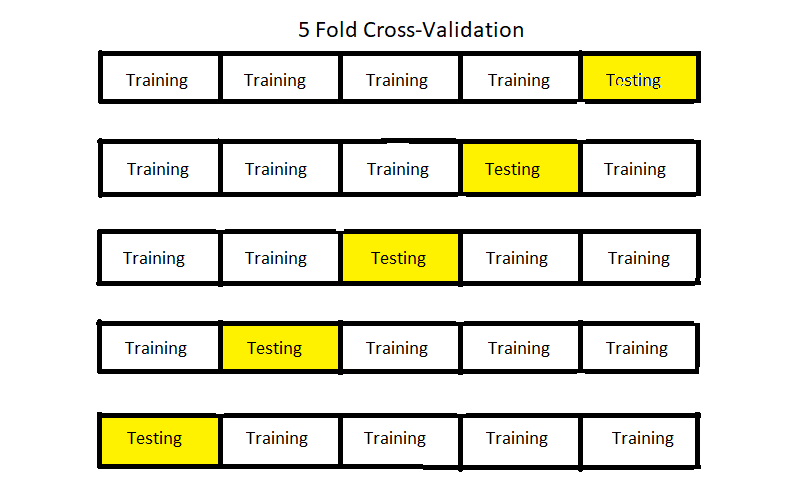

In [ ]:
from sklearn.model_selection import KFold

n_splits = 5
shuffle = True
random_state = 42

kfold = KFold(n_splits = n_splits, shuffle = shuffle, random_state = random_state)

split_list = [(train_index, val_index) for train_index, val_index in kfold.split(data_titanic)]

In [ ]:
fold_0 = split_list[0]
train_index_0 = fold_0[0]
val_index_0 = fold_0[1]
print(train_index_0[:10])
print(val_index_0[:10])

[ 0  1  2  3  4  6  7  8  9 11]
[ 5 10 23 25 30 31 33 39 44 49]


## StratifiedKFold

In [ ]:
from sklearn.model_selection import StratifiedKFold

n_splits = 5
shuffle = True
random_state = 1

stratified_kfold = StratifiedKFold(n_splits = n_splits, shuffle = shuffle, random_state = random_state)
split_list_stratified = [(train_index, val_index) for train_index, val_index in
                                    stratified_kfold.split(data_titanic, y = data_titanic[data_titanic_target])]

In [ ]:
fold_0_stratified = split_list_stratified[0]
train_index_stratified_0 = fold_0_stratified[0]
val_index_stratified_0 = fold_0_stratified[1]

In [ ]:
# mean target value of KFold
print(data_titanic[data_titanic_target][train_index_0].mean(),
    data_titanic[data_titanic_target][val_index_0].mean())

0.37640449438202245 0.4134078212290503


In [ ]:
# mean target value of StratifiedKFold
print(data_titanic[data_titanic_target][train_index_stratified_0].mean(),
    data_titanic[data_titanic_target][val_index_stratified_0].mean())

0.38342696629213485 0.3854748603351955


<Axes: >

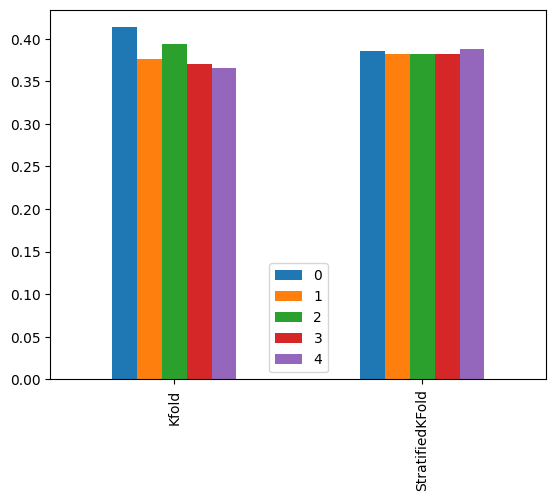

In [ ]:
pd.DataFrame([[data_titanic[data_titanic_target][val_index].mean() for _, val_index in split_list],
              [data_titanic[data_titanic_target][val_index].mean() for _, val_index in split_list_stratified]], index = ['Kfold', 'StratifiedKFold']).plot.bar()

## StratifiedKFold Regression

<Axes: >

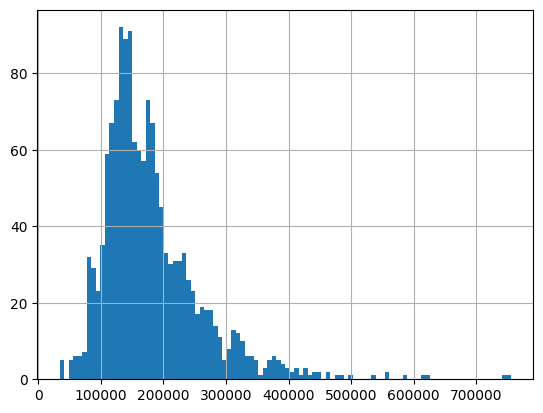

In [ ]:
data_house[data_house_target].hist(bins = 100)

In [ ]:
data_house_target_bins = pd.qcut(data_house[data_house_target], 10).astype('category').cat.codes
print(data_house_target_bins.value_counts())

3    150
7    149
1    149
6    146
0    146
9    145
8    144
2    144
5    144
4    143
Name: count, dtype: int64


In [ ]:
random_state = 600
kfold = KFold(n_splits = n_splits, shuffle = shuffle, random_state = random_state)
split_list_reg = [(train_index, val_index) for train_index, val_index in
                                kfold.split(data_house, y = data_house_target_bins)]
train_index = split_list_reg[0][0]
val_index = split_list_reg[0][1]
print('mean train value: ', data_house[data_house_target][train_index].mean(),
    'mean val value: ', data_house[data_house_target][val_index].mean(),
     'div: ', data_house[data_house_target][val_index].mean() / data_house[data_house_target][train_index].mean())

mean train value:  181559.47089041097 mean val value:  178368.09589041097 div:  0.9824224261926479


In [ ]:
stratified_kfold = StratifiedKFold(n_splits = n_splits, shuffle = shuffle, random_state = random_state)
split_list_stratified_reg = [(train_index, val_index) for train_index, val_index in
                                stratified_kfold.split(data_house, y = data_house_target_bins)]
train_index = split_list_stratified_reg[0][0]
val_index = split_list_stratified_reg[0][1]
print('mean train value: ', data_house[data_house_target][train_index].mean(),
    'mean val value: ', data_house[data_house_target][val_index].mean(),
     'div: ', data_house[data_house_target][val_index].mean() / data_house[data_house_target][train_index].mean())

mean train value:  181045.26455479453 mean val value:  180424.92123287672 div:  0.996573545718286


<Axes: >

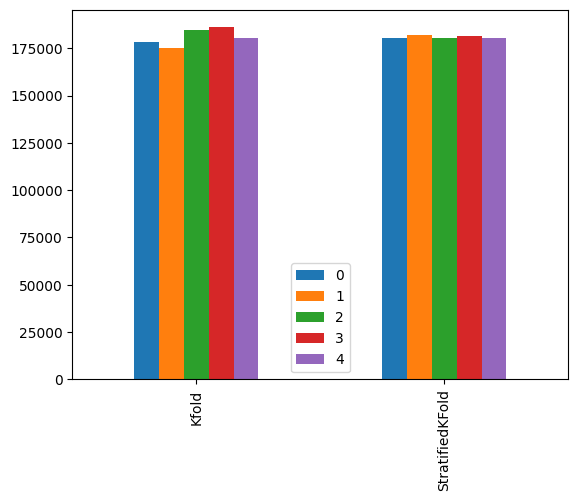

In [ ]:
pd.DataFrame([[data_house[data_house_target][val_index].mean() for _, val_index in split_list_reg],
              [data_house[data_house_target][val_index].mean() for _, val_index in split_list_stratified_reg]], index = ['Kfold', 'StratifiedKFold']).plot.bar()

## GroupKFold

In [ ]:
from sklearn.model_selection import GroupKFold

n_splits = 3
shuffle = True
random_state = 322

group_kfold = GroupKFold(n_splits = n_splits, shuffle = shuffle, random_state = random_state)
split_list_group = [(train_index, val_index) for train_index, val_index in
                group_kfold.split(data_titanic, y = data_titanic[data_titanic_target], groups = data_titanic['Pclass'])]

In [ ]:
fold_0_group = split_list_group[0]
train_index_group_0 = fold_0_group[0]
val_index_group_0 = fold_0_group[1]

In [ ]:
print('train unique values: ', data_titanic['Pclass'][train_index_group_0].unique())
print('val unique values: ', data_titanic['Pclass'][val_index_group_0].unique())

train unique values:  [1 2]
val unique values:  [3]


## TimeKFold

In [ ]:
data_house = data_house.sort_values('YrSold').reset_index(drop = True)
unique_years = data_house['YrSold'].unique()
print(unique_years)

[2006 2007 2008 2009 2010]


In [ ]:
n_splits = 2
split_list_timekfold = []
for year in sorted(unique_years)[::-1][:n_splits]:
    train_index = data_house.index[data_house['YrSold'] < year].values
    val_index = data_house.index[data_house['YrSold'] == year].values
    split_list_timekfold += [(train_index, val_index)]
    print('train unique values: ', data_house['YrSold'][train_index].unique())
    print('val unique values: ', data_house['YrSold'][val_index].unique())

train unique values:  [2006 2007 2008 2009]
val unique values:  [2010]
train unique values:  [2006 2007 2008]
val unique values:  [2009]


## Other methods

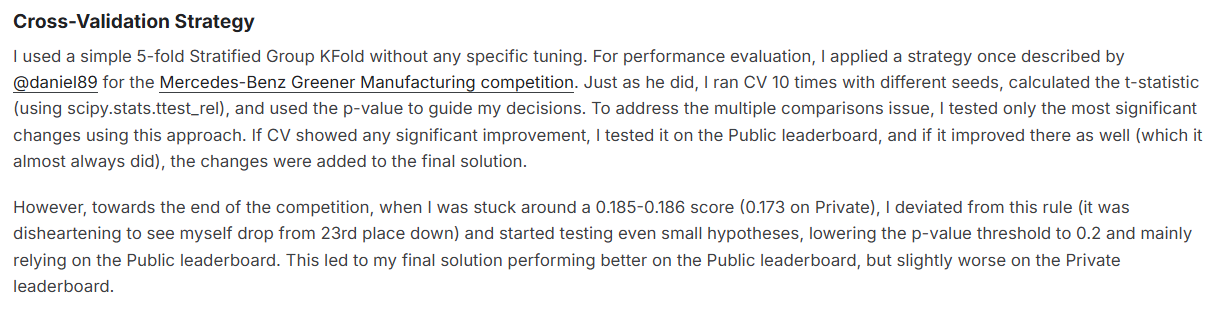
[ISIC 2024 1st Place](https://www.kaggle.com/competitions/isic-2024-challenge/discussion/533196)

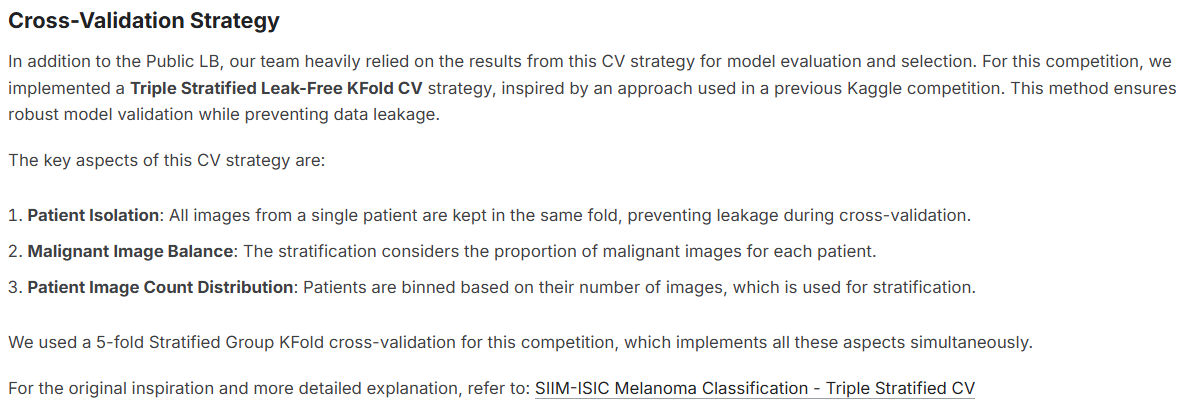
[ISIC 2024 2nd Place](https://www.kaggle.com/competitions/isic-2024-challenge/discussion/532704)

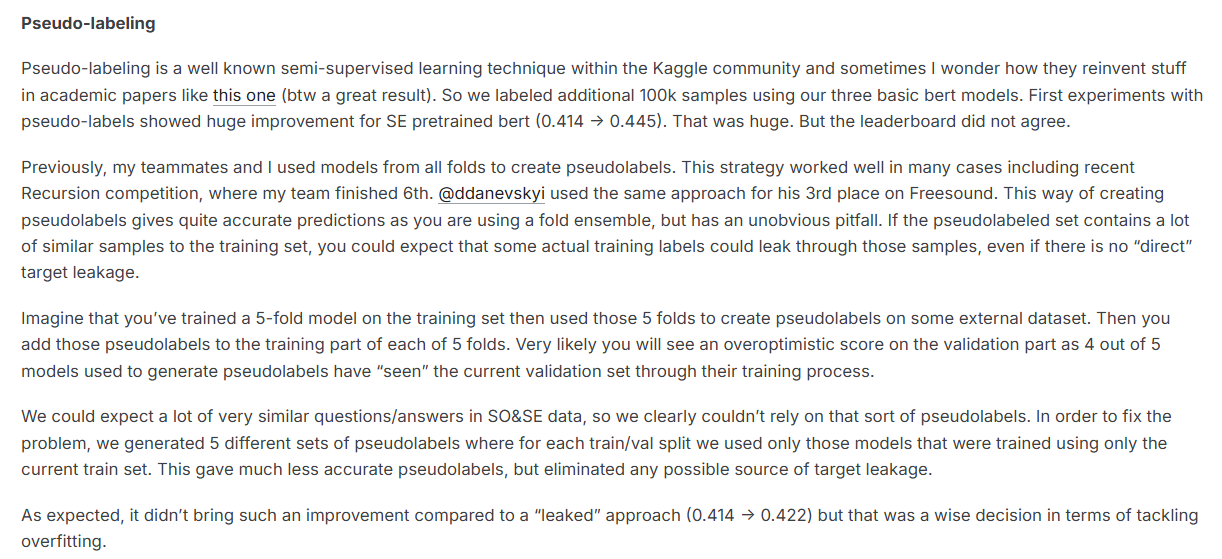
[Google QUEST 1st place](https://www.kaggle.com/c/google-quest-challenge/discussion/129840)

[Double Cross Validation](https://www.youtube.com/watch?v=g335THJxkto)

In [ ]:
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import StratifiedGroupKFold

## Adversial validation

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_predict, train_test_split

In [ ]:
for col in ['Sex', 'Embarked']:
    data_titanic[col] = data_titanic[col].astype('category').cat.codes

In [ ]:
data_titanic_train, data_titanic_test = train_test_split(data_titanic, train_size = 0.75, random_state = 42)

In [ ]:
data_titanic_train = data_titanic_train.copy()
data_titanic_test = data_titanic_test.copy()

In [ ]:
data_titanic_train['new_feature'] = (data_titanic_train[data_titanic_target]) + np.random.uniform(-0.75, 0.75, size = data_titanic_train.shape[0])
data_titanic_test['new_feature']  = 0

In [ ]:
train_cols = ['Sex', 'Embarked', 'Age', 'SibSp', 'Parch', 'Pclass', 'new_feature']
model = RandomForestClassifier(random_state = 42)
cv_preds = cross_val_predict(model, data_titanic_train[train_cols], data_titanic_train[data_titanic_target])
roc_auc_score(data_titanic_train[data_titanic_target],  cv_preds )

0.9393161579122815

In [ ]:
model.fit(data_titanic_train[train_cols], data_titanic_train[data_titanic_target])
test_predict = model.predict(data_titanic_test[train_cols])
roc_auc_score(data_titanic_test[data_titanic_target],  test_predict )

0.5

In [ ]:
data_titanic_train['adversial_target'] = 0
data_titanic_test['adversial_target'] = 1

data_titanic_adversial = pd.concat([data_titanic_train, data_titanic_test])

In [ ]:
model = RandomForestClassifier(random_state = 42)
model.fit(data_titanic_adversial[train_cols], data_titanic_adversial['adversial_target'])
forest_importances = pd.Series(model.feature_importances_, index=train_cols)

<Axes: >

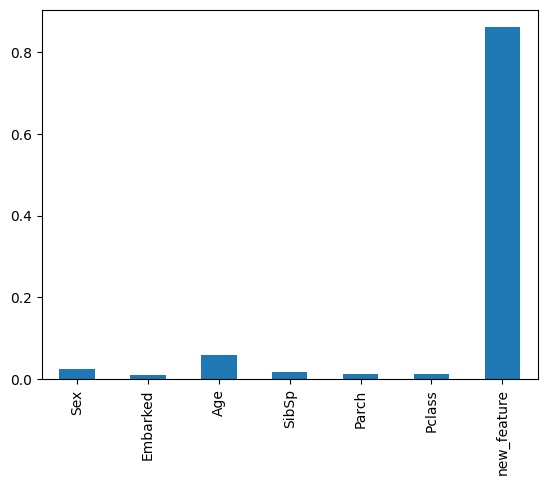

In [ ]:
forest_importances.plot.bar()

In [ ]:
train_cols = ['Sex', 'Embarked', 'Age', 'SibSp', 'Parch', 'Pclass']
model = RandomForestClassifier(random_state = 42)
cv_preds = cross_val_predict(model, data_titanic_train[train_cols], data_titanic_train[data_titanic_target])
roc_auc_score(data_titanic_train[data_titanic_target],  cv_preds )

0.7849849992856802

In [ ]:
model.fit(data_titanic_train[train_cols], data_titanic_train[data_titanic_target])
test_predict = model.predict(data_titanic_test[train_cols])
roc_auc_score(data_titanic_test[data_titanic_target],  test_predict )

0.7774190843535134

## Public leaderboard probing

1. Come up with the idea.
2. Submit baseline.
3. Submit baseline with zeros.
4. Compape and change validation

## Early stopping

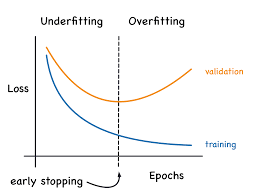

Checking number trees ot number epochs.

Check metric.
1. Low std (1 - 3 %) - different number of epochs
2. Medium std (5 - 15 %) - same number of epochs
3. Big std (15 - 100 %) - same number of epochs over different splits